**Day 3  Daily Returns, Expected Returns, and Annualized Covariance Matrix: Validated, Visualized, and Stored!**

In [1]:
import pandas as pd



daily_return = pd.read_csv("../Data/daily_returns.csv",index_col="Date")
daily_return

,HDFCBANK.NS,ICICIBANK.NS,INFY.NS,RELIANCE.NS,TCS.NS
Date,,,,,
2020-06-04,-0.020103,-0.025221,0.008838,0.024746,0.022188
2020-06-05,0.031596,0.026880,-0.005934,0.001203,-0.020703
2020-06-08,-0.016887,0.007279,0.024589,-0.007713,0.011473
2020-06-09,-0.028152,-0.031267,-0.004508,-0.020612,0.000145
2020-06-10,0.004609,0.012767,-0.002439,0.022770,0.017712
...,...,...,...,...,...
2025-05-28,-0.001454,0.005116,0.001083,-0.006469,-0.000286
2025-05-29,0.002080,0.001857,0.008780,0.003468,0.000114
2025-05-30,0.009027,-0.007346,-0.000576,0.002186,-0.009920


In [2]:
meanDailyReturns = daily_return.mean()
meanAnnualReturns = meanDailyReturns*252
meanAnnualReturns = meanAnnualReturns.to_frame(name="Mean Annual Return")
print(meanAnnualReturns)

              Mean Annual Return
HDFCBANK.NS             0.163487
ICICIBANK.NS            0.322150
INFY.NS                 0.214204
RELIANCE.NS             0.171169
TCS.NS                  0.144119


In [3]:
daily_covmatrix = daily_return.cov()
annual_covmatrix = daily_covmatrix * 252
print(annual_covmatrix)


daily_return.var()*252

              HDFCBANK.NS  ICICIBANK.NS   INFY.NS  RELIANCE.NS    TCS.NS
HDFCBANK.NS      0.053002      0.031751  0.014150     0.019204  0.010385
ICICIBANK.NS     0.031751      0.063661  0.015485     0.019841  0.009939
INFY.NS          0.014150      0.015485  0.063522     0.015261  0.037833
RELIANCE.NS      0.019204      0.019841  0.015261     0.060963  0.014690
TCS.NS           0.010385      0.009939  0.037833     0.014690  0.047503


HDFCBANK.NS     0.053002
ICICIBANK.NS    0.063661
INFY.NS         0.063522
RELIANCE.NS     0.060963
TCS.NS          0.047503
dtype: float64

In [4]:
annual_covmatrix.to_csv("../Reports/cov_matrix.csv")
meanAnnualReturns.to_csv("../Reports/expected_returns.csv")

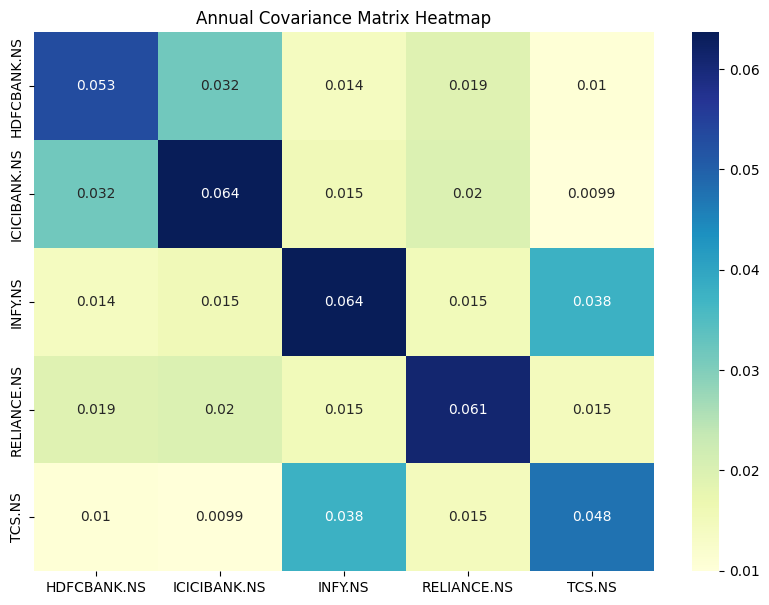

In [5]:
import seaborn as sb
import matplotlib.pyplot as plt

# Create a heatmap of the annual covariance matrix
plt.figure(figsize=(10,7))
sb.heatmap(annual_covmatrix, annot=True, cmap="YlGnBu")  # annot=True shows values, cmap sets the color
plt.title("Annual Covariance Matrix Heatmap")
plt.savefig("../Reports/Charts/Annual_Cov_Matrix_Heatmap.png", dpi=600)
plt.show()